# Dynamics of how particle no density changes with time.

plot generated -----:


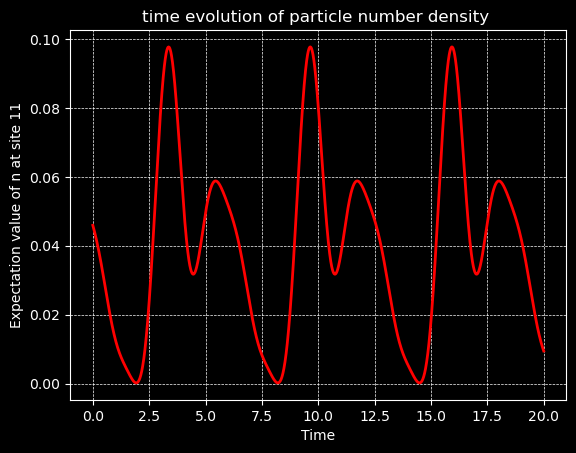

In [24]:
import numpy as np
import matplotlib.pyplot as plt


#load the eigenvalues and eigenvectors
E = np.loadtxt("/Users/photon/Downloads/dynamics_implementation/hamtest_eigenvalues.txt", delimiter=",")  # shape: (N,)
V = np.loadtxt("/Users/photon/Downloads/dynamics_implementation/hamtest_eigenvectors.txt", delimiter=",")  # shape: (N, N) each column is an eigenvector



#normalize eigevectors

V = V /np.linalg.norm(V,axis=0) # this gives you the normalized eigenvectors which are the columns of V and norms   1.

N=len(E)
#print(N)


#taking a random initial state which will be my guess and be normalized as well
#this is our guess for the initial state psi_0
psi_0 = np.random.rand(N)+1j*np.random.rand(N)
norm_before= np.linalg.norm(psi_0)
#print("norm before normalisation of psi_0:",norm_before)
psi_0 = psi_0 / np.linalg.norm(psi_0)
norm_after = np.linalg.norm(psi_0)
#print("norm after normalisation of psi_0:",norm_after)


# c_i = <psi_i | psi_0> = V^dagger @ psi_0
# c is a vector of coefficients in the eigenbasis
c = V.conj().T@ psi_0

#print("c:", c)


site_index = 11
n = np.zeros((N,N), dtype=complex) # thid is the number operator matrix n
# n[i,j] = c_i^dagger c_j
n[site_index, site_index] = 1.0 

#print("n:", n)
time = np.linspace(0,20,2000)

#time = np.linspace(0,200,200000)
expectation_values = []


for t in time:

    c_t = c * np.exp(-1j *E*t)
    psi_t = V @ c_t
    #print("psi_t:", psi_t)
    exp_val = np.vdot(psi_t,n @ psi_t)

    expectation_values.append(np.real(exp_val))


#plot
print("plot generated -----:")
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')        
ax.set_facecolor('black')               
ax.plot(time, expectation_values, color='red', linewidth=2)  
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.grid(0.5, color='white', linestyle='--', linewidth=0.5)  

ax.set_xlabel("Time")
ax.set_ylabel("Expectation value of n at site {}".format(site_index))
ax.set_title("time evolution of particle number density ")
plt.show()
